In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
start = datetime.datetime(2006,1,1)
end= datetime.datetime(2019,1,1)

# Read Data

In [4]:
# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)
# City Group
C= data.DataReader('C','yahoo', start, end)
# Goldmen Sachs
GS = data.DataReader('GS','yahoo', start, end)
#JP Morgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)
#Morgan Stanley
MS = data.DataReader('MS','yahoo', start,end)
#Wells Fargo
WFC =data.DataReader('WFC', 'yahoo', start, end) 

# Data Understanding

In [30]:
BAC.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.18,46.150002,46.919998,47.080002,16296700.0,35.953278


In [31]:
C.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.0,492.899994,1537600.0,455.117981


In [32]:
GS.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,109.526512


In [109]:
JPM.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,28.41839


In [34]:
MS.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,38.591286


In [35]:
WFC.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975,31.195,31.6,31.9,11016400.0,21.485973


In [5]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [6]:
bank_Stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 1, keys = tickers)

In [97]:
bank_Stocks.head()

BAC                                     ...            WFC                                  
                 High        Low       Open      Close    ...           Open      Close      Volume  Adj Close
Date                                                      ...                                                 
2006-01-03  47.180000  46.150002  46.919998  47.080002    ...      31.600000  31.900000  11016400.0  21.485973
2006-01-04  47.240002  46.450001  47.000000  46.580002    ...      31.799999  31.530001  10870000.0  21.236753
2006-01-05  46.830002  46.320000  46.580002  46.639999    ...      31.500000  31.495001  10158000.0  21.213186
2006-01-06  46.910000  46.349998  46.799999  46.570000    ...      31.580000  31.680000   8403800.0  21.337786
2006-01-09  46.970001  46.360001  46.720001  46.599998    ...      31.674999  31.674999   5619600.0  21.334421

[5 rows x 36 columns]

In [7]:
bank_Stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [49]:
bank_Stocks.head()

Bank Ticker        BAC                                     ...            WFC                                  
Stock Info        High        Low       Open      Close    ...           Open      Close      Volume  Adj Close
Date                                                       ...                                                 
2006-01-03   47.180000  46.150002  46.919998  47.080002    ...      31.600000  31.900000  11016400.0  21.485973
2006-01-04   47.240002  46.450001  47.000000  46.580002    ...      31.799999  31.530001  10870000.0  21.236753
2006-01-05   46.830002  46.320000  46.580002  46.639999    ...      31.500000  31.495001  10158000.0  21.213186
2006-01-06   46.910000  46.349998  46.799999  46.570000    ...      31.580000  31.680000   8403800.0  21.337786
2006-01-09   46.970001  46.360001  46.720001  46.599998    ...      31.674999  31.674999   5619600.0  21.334421

[5 rows x 36 columns]

# Exploratory Data Analysis

### 1. What is the max Close price of each bank's stock throught the time period?

In [8]:
#for i in tickers:
 #   print(i,bank_Stocks[i]['Close'].max())
bank_Stocks.xs(key = 'Close', axis =1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    118.769997
MS      89.300003
WFC     65.930000
dtype: float64

# Create returns for each bank, returns is defined as:
# Rate of return = (Price on that day / Price on previous day ) - 1

In [10]:
returns = pd.DataFrame()

In [11]:
for tick in tickers:
    returns[tick+'Return'] = bank_Stocks[tick]['Close'].pct_change()

In [90]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


# Check what stock stands out to you

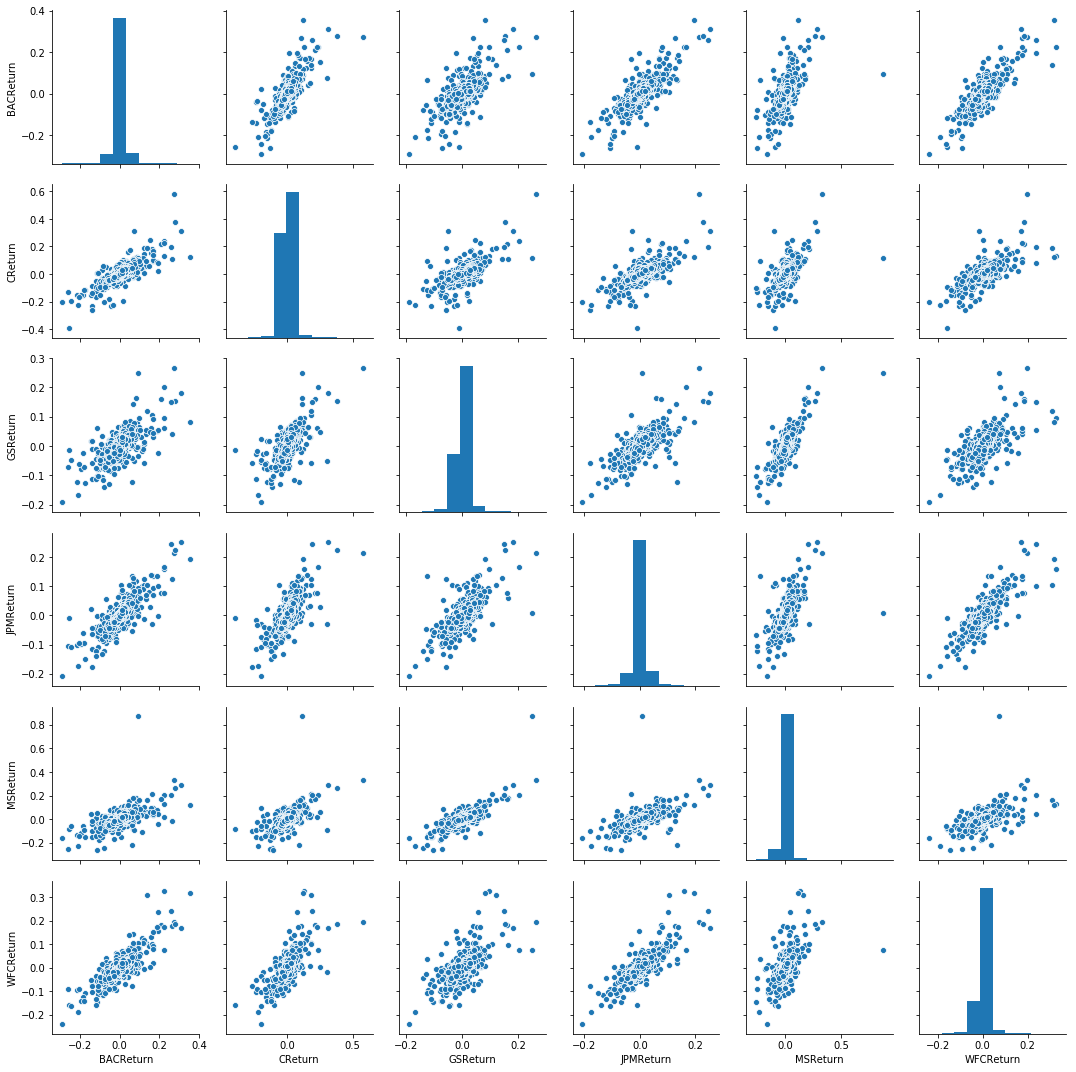

In [102]:
sns.pairplot(returns);

# Check best and worst single day return

In [108]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [107]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

- Looks like lot of companies had worst returns on 01/20/2009. It is found that it was Barak Obama's innauguration day. 
- JP Morgan had highest return on 01/21/2009.
- JP Morgan and Morgan Stanley had largest drop and biggest gain were very close to one another. did anything significant happen in that time frame?

# which stock would you classify as the riskiest over the entire time period and which would you classify as the riskiest for the year 2018

In [110]:
returns.std()

BACReturn    0.033124
CReturn      0.034762
GSReturn     0.023455
JPMReturn    0.025106
MSReturn     0.034185
WFCReturn    0.027336
dtype: float64

In [115]:
returns.ix['2018-01-01':'2018-12-31'].std()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BACReturn    0.015616
CReturn      0.015093
GSReturn     0.016175
JPMReturn    0.013879
MSReturn     0.017187
WFCReturn    0.014804
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


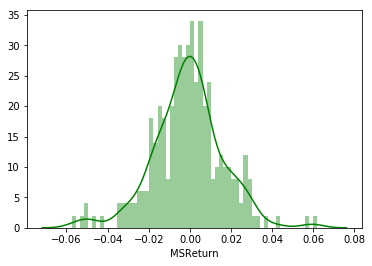

In [123]:
sns.distplot(returns.ix['2018-01-01':'2018-12-31']['MSReturn'], color = 'green', bins = 60);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



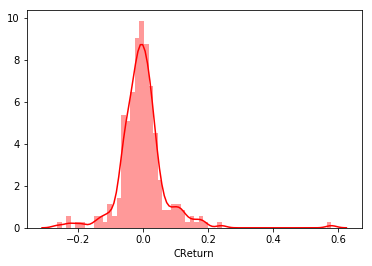

In [30]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['CReturn'], color = 'r', bins = 60);

# Comparing both the above distribution and we can see that their is an outlier and their is almost a 10 times difference. This is an indication of the financial crisis the stock went through.

# Close price for each bank for entire index of time.

In [36]:
import plotly
import cufflinks as cf
plotly.tools.set_credentials_file(username='veenapriya', api_key='SodDhiYLY7KOXWu1OacR')


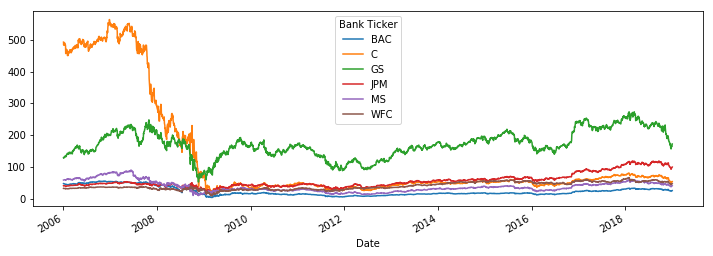

In [12]:
bank_Stocks.xs(key='Close', axis = 1, level = 'Stock Info').plot(figsize = (12,4))

# we can see that City bank and Goldmen Sachs had a crash in 2008.

In [37]:
bank_Stocks.xs(key='Close', axis = 1, level = 'Stock Info').iplot()

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~veenapriya/0 or inside your plot.ly account where it is named 'Plotly Playground 2019-06-15 12:45:25'


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Moving averages
## Let's analyse the moving averages for these stocks in the year 2008.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



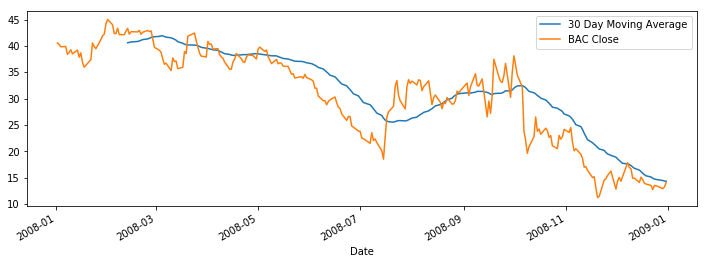

In [44]:
plt.figure(figsize=(12,4));
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(label = '30 Day Moving Average');
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label ='BAC Close');
plt.legend();


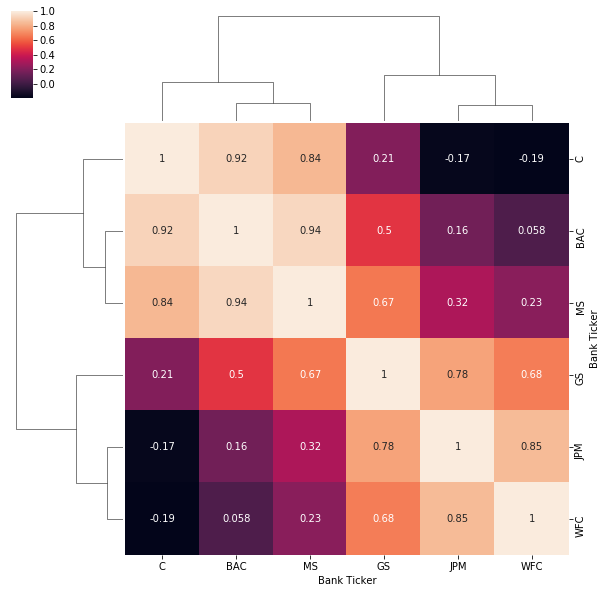

In [32]:
sns.clustermap(bank_Stocks.xs(key ='Close', axis = 1, level ='Stock Info').corr(), annot = True)

# From the above plot we can see that City bank, Bank of America are more correlated and in the other group JP Morgan, and Wells Fargo are more correlated.

In [67]:
#close_corr = bank_Stocks.xs(key ='Close', axis = 1, level ='Stock Info').corr()
#close_corr.iplot(kind ='heatmap', colorscale ='rdylbu')

bac18 = BAC[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
bac18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [47]:
c18 = C[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
c18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [49]:
ms18 = MS[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
ms18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [53]:
gs18 = GS[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
gs18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [54]:
JPM18 = JPM[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
JPM18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [55]:
WFcm18 = WFC[['Open','High','Low','Close']].ix['2018-01-01':'2019-01-01']
WFcm18.iplot(kind ='candle')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [58]:
MS['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [59]:
C['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [60]:
JPM['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [61]:
WFC['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [62]:
BAC['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [63]:
GS['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='sma', periods =[13,21,55])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
# Create a Bollinger band plot for Bank of America for the year 2018 to analyse the standard deviation of closing price.

In [65]:
BAC['Close'].ix['2018-01-01':'2019-01-01'].ta_plot(study ='boll')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

